<a href="https://colab.research.google.com/github/roveen001/trafficlightrecognition/blob/main/TLR_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers

import matplotlib.pyplot as plt 


In [7]:
tlr_train = pd.read_csv('drive/MyDrive/archive/Train.csv',header = 0)
tlr_train.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [8]:
# the task is identify the image from other measurements
# seperate feature/class, labels for traning 
# also the file path
tlr_features = tlr_train.copy()
tlr_labels = tlr_features.pop('ClassId')
tlr_file = tlr_features.pop('Path')

In [9]:
# convert to numpy array
tlr_features = np.asarray(tlr_features)
tlr_features

array([[27, 26,  5,  5, 22, 20],
       [28, 27,  5,  6, 23, 22],
       [29, 26,  6,  5, 24, 21],
       ...,
       [58, 62,  5,  6, 53, 57],
       [63, 69,  5,  7, 58, 63],
       [68, 69,  7,  6, 62, 63]])

In [10]:
tlr_labels

0        20
1        20
2        20
3        20
4        20
         ..
39204    42
39205    42
39206    42
39207    42
39208    42
Name: ClassId, Length: 39209, dtype: int64

In [11]:
# making regression model to predict the class
# using tf.keras.Sequential 

tlr_model = tf.keras.Sequential([
    layers.Dense(64),
    layers.Dense(1)
])

tlr_model.compile(loss=tf.keras.losses.MeanSquaredError(),
                  optimizer=tf.keras.optimizers.Adam())

In [12]:
# train the model
history = tlr_model.fit(tlr_features,tlr_labels, epochs=10)

Epoch 1/10
1226/1226 [==============================] - 3s 2ms/step - loss: 155.9252
Epoch 2/10
1226/1226 [==============================] - 2s 2ms/step - loss: 149.7618
Epoch 3/10
1226/1226 [==============================] - 2s 2ms/step - loss: 148.7498
Epoch 4/10
1226/1226 [==============================] - 2s 2ms/step - loss: 148.8410
Epoch 5/10
1226/1226 [==============================] - 2s 2ms/step - loss: 147.7379
Epoch 6/10
1226/1226 [==============================] - 2s 2ms/step - loss: 147.4262
Epoch 7/10
1226/1226 [==============================] - 2s 1ms/step - loss: 147.2405
Epoch 8/10
1226/1226 [==============================] - 2s 2ms/step - loss: 146.6476
Epoch 9/10
1226/1226 [==============================] - 2s 2ms/step - loss: 146.6143
Epoch 10/10
1226/1226 [==============================] - 2s 1ms/step - loss: 146.1442


In [13]:
tlr_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                448       
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


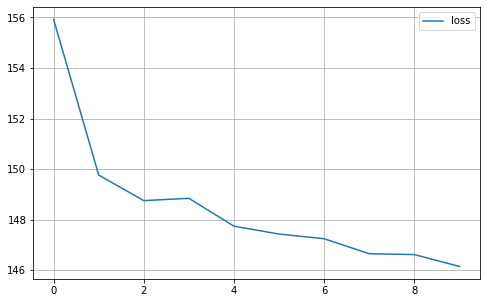

In [14]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)

Basic Preprocessing 


In [15]:
# normalise the inputs to the model,
# keras normalzation fn tha precomputes the mean and variance of each column and uses it to normalise it

normalize = layers.Normalization()
normalize.adapt(tlr_features)

In [16]:
# after normalization

tlr_model = tf.keras.Sequential([
    normalize,
    layers.Dense(64),
    layers.Dense(1)
])

tlr_model.compile(loss=tf.keras.losses.MeanSquaredError(),
                  optimizer=tf.keras.optimizers.Adam())

In [17]:
# train the model
history = tlr_model.fit(tlr_features,tlr_labels, epochs=10)

Epoch 1/10
1226/1226 [==============================] - 2s 2ms/step - loss: 184.7674
Epoch 2/10
1226/1226 [==============================] - 2s 2ms/step - loss: 143.9146
Epoch 3/10
1226/1226 [==============================] - 3s 2ms/step - loss: 143.8551
Epoch 4/10
1226/1226 [==============================] - 2s 2ms/step - loss: 143.8192
Epoch 5/10
1226/1226 [==============================] - 2s 2ms/step - loss: 143.8501
Epoch 6/10
1226/1226 [==============================] - 2s 2ms/step - loss: 143.8293
Epoch 7/10
1226/1226 [==============================] - 2s 2ms/step - loss: 143.9034
Epoch 8/10
1226/1226 [==============================] - 2s 2ms/step - loss: 143.9342
Epoch 9/10
1226/1226 [==============================] - 2s 2ms/step - loss: 143.8973
Epoch 10/10
1226/1226 [==============================] - 2s 2ms/step - loss: 143.9567


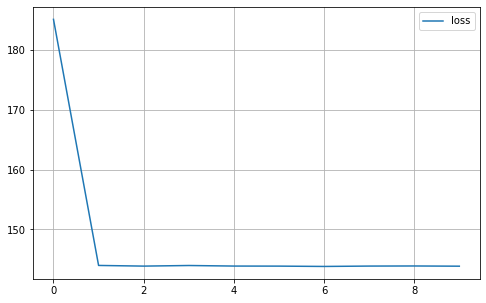

In [13]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)

Using the pre-trained model as feature extractor preprocessor 
using Fine tuning 

In [18]:
from keras.applications.vgg16 import VGG16
# load the  VGG16 model remove the last FD layers
# frezzin the weights
vgg16_model = VGG16(weights='imagenet',
              include_top=False,
              input_shape=(240,240,3))

In [19]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 240, 240, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 240, 240, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 240, 240, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 120, 120, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 120, 120, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 120, 120, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 60, 60, 128)       0     

In [21]:
traindf=pd.read_csv('drive/MyDrive/archive/Test.csv')
traindf.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [22]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12630 entries, 0 to 12629
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Width    12630 non-null  int64 
 1   Height   12630 non-null  int64 
 2   Roi.X1   12630 non-null  int64 
 3   Roi.Y1   12630 non-null  int64 
 4   Roi.X2   12630 non-null  int64 
 5   Roi.Y2   12630 non-null  int64 
 6   ClassId  12630 non-null  int64 
 7   Path     12630 non-null  object
dtypes: int64(7), object(1)
memory usage: 789.5+ KB


In [23]:
traindf = traindf.convert_dtypes()
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12630 entries, 0 to 12629
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Width    12630 non-null  Int64 
 1   Height   12630 non-null  Int64 
 2   Roi.X1   12630 non-null  Int64 
 3   Roi.Y1   12630 non-null  Int64 
 4   Roi.X2   12630 non-null  Int64 
 5   Roi.Y2   12630 non-null  Int64 
 6   ClassId  12630 non-null  Int64 
 7   Path     12630 non-null  string
dtypes: Int64(7), string(1)
memory usage: 875.8 KB


In [24]:
traindf['ClassId'] = traindf['ClassId'].map(str)
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12630 entries, 0 to 12629
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Width    12630 non-null  Int64 
 1   Height   12630 non-null  Int64 
 2   Roi.X1   12630 non-null  Int64 
 3   Roi.Y1   12630 non-null  Int64 
 4   Roi.X2   12630 non-null  Int64 
 5   Roi.Y2   12630 non-null  Int64 
 6   ClassId  12630 non-null  object
 7   Path     12630 non-null  string
dtypes: Int64(6), object(1), string(1)
memory usage: 863.5+ KB


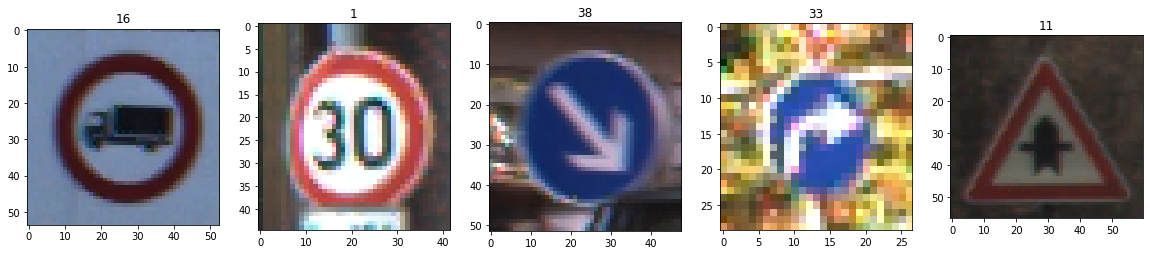

In [27]:
# see some images
from skimage.io import imread
import os
img_path='drive/MyDrive/archive/'
images = [(tl_image, tl_label) for (tl_image, tl_label) in zip(traindf.Path[:5], traindf.ClassId[:5])]
fig, m_axs = plt.subplots(1, len(images), figsize = (20, 10))
#show the images and label them
for ii, c_ax in enumerate(m_axs):
    c_ax.imshow(imread(os.path.join(img_path,images[ii][0])))
    c_ax.set_title(images[ii][1])

In [28]:
# validation_split sets the percentage of data generated
# to be used in validation phase
from keras.preprocessing import image

datagen=image.ImageDataGenerator(rescale=1./255, validation_split = 0.1)
test_datagen=image.ImageDataGenerator(rescale=1./255) 

In [29]:
train_generator=datagen.flow_from_dataframe(
  dataframe=traindf,
  directory='drive/MyDrive/archive',
  x_col="Path",
  y_col="ClassId",
  #has_ext = True,
  subset="training",
  batch_size=32,
  seed=42,
  shuffle=True,
  class_mode="categorical",
  validate_filenames=True, 
  target_size=(240,240)    

)                                            

valid_generator=datagen.flow_from_dataframe(
  dataframe=traindf,
  directory='drive/MyDrive/archive',
  x_col="Path",
  y_col="ClassId",
  #has_ext = True,
  subset="validation",
  batch_size=32,
  seed=42,
  shuffle=True,
  class_mode="categorical",
  validate_filenames=True,
  target_size=(240,240)
)

test_datagen=image.ImageDataGenerator(rescale=1./255)

test_generator=test_datagen.flow_from_directory(
  directory="drive/MyDrive/archive/Train/",
  batch_size=1,
  seed=42,
  shuffle=False,
  class_mode=None,
  target_size=(240,240)
)

Found 11367 validated image filenames belonging to 43 classes.
Found 1263 validated image filenames belonging to 43 classes.
Found 39209 images belonging to 43 classes.


Next let's build, compile and train the model. Here I'll use a simple Convolutional layer, Dropout and GlobalMaxPooling for the sake of simplicity. You can plug your model right here and test it! Just make sure input_shape from Conv2D is the same that target_size in the generators.

In [32]:
from keras.models import Sequential
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
from keras.metrics import top_k_categorical_accuracy
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D, Concatenate, Flatten, Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Model


def top_5_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=5)


for layer in vgg16_model.layers:
  layers.trainable = False

x = Flatten()(vgg16_model.output)
x = Dense(43, activation = 'softmax')(x)
model = Model(inputs=vgg16_model.input, outputs=x)
# model.summary()

model.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

# early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5)
checkpointer = ModelCheckpoint(filepath='drive/myDrive/Colab Notebooks/weights.hdf5', 
                               verbose=1, save_best_only=True)

early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5)


In [33]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 240, 240, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 240, 240, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 240, 240, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 120, 120, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 120, 120, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 120, 120, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 60, 60, 128)       0   

In [1]:
NTRAIN_STEPS = train_generator.n // train_generator.batch_size
NVALID_STEPS = valid_generator.n // valid_generator.batch_size

history = model.fit(train_generator,
          steps_per_epoch=NTRAIN_STEPS,
          validation_data=valid_generator,
          validation_steps=NVALID_STEPS,
          epochs=2, callbacks = [checkpointer, early_stopping])

NameError: ignored